# Exploratory Data Analysis (EDA)
### Dataset: Global Superstore
Author: Aryan Singh  


In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv(r"C:\Users\Aryan Singh\Desktop\Internship\task 2\superstore.csv", encoding='ISO-8859-1')
data.head()


since the encoding of my dataset was differnt than what pandas can read thats why we mentioned the encodings used in this dataset

In [44]:
data.info()
data.dropna(inplace=True)
print(data.isnull().sum())
data.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


we deleted empty entries and suplicate entries with these two functions 
dropna drops na valuede cell with by default axis set to 0 for row deletion
drop_duplicate

In [45]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
print(numeric_cols)

Index(['Row ID', 'Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')


selected every numeric columns in order to gather z scores so that we can find the outliers
np.numbers lets consider every type of data containing integers for ex int, float, decimal etc

In [46]:
for col in numeric_cols:
    mean = data[col].mean()
    std = data[col].std()
    z = (data[col]-mean)/std
    #update the data with only filtered data
    data = data[z.abs() <= 3]


In [47]:

for col in numeric_cols:
    col_data = data[col]
    print(f"Column: {col}")
    print(f"  Mean: {col_data.mean()}")
    print(f"  Median: {col_data.median()}")
    print(f"  Standard Deviation: {col_data.std()}")
    print(f"  Variance: {col_data.var()}")
    print("-" * 40)


Column: Row ID
  Mean: 4989.4515187547295
  Median: 4994.0
  Standard Deviation: 2878.5813668392598
  Variance: 8286230.68551418
----------------------------------------
Column: Postal Code
  Mean: 54858.21911144741
  Median: 53711.0
  Standard Deviation: 32358.49494062694
  Variance: 1047072194.8225794
----------------------------------------
Column: Sales
  Mean: 158.19372344611392
  Median: 51.465
  Standard Deviation: 250.5392884991744
  Variance: 62769.93508167254
----------------------------------------
Column: Quantity
  Mean: 3.6211220408604476
  Median: 3.0
  Standard Deviation: 1.9917405875051173
  Variance: 3.96703056791523
----------------------------------------
Column: Discount
  Mean: 0.13475299967571072
  Median: 0.1
  Standard Deviation: 0.17259604787190513
  Variance: 0.029789395741000972
----------------------------------------
Column: Profit
  Mean: 20.332619814074153
  Median: 8.771
  Standard Deviation: 55.58123355325716
  Variance: 3089.273523301719
-------------

from numeric cols we need to find mean, standard deviation, median, variance to understand the distribution of the data
we use a cold_data variable which will store the data of the particular data which is currently selected in the loop....then we print stats as mentioned...while using col_data to find the meand median etc for finding the stats value for only the particular selected column...as the next loop start the column changes...the columns are stored as array here

In [48]:
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

               Row ID  Postal Code     Sales  Quantity  Discount    Profit
Row ID       1.000000     0.010681 -0.015281 -0.003759  0.012392 -0.014954
Postal Code  0.010681     1.000000  0.022701  0.017063  0.011372 -0.033022
Sales       -0.015281     0.022701  1.000000  0.230348 -0.005486  0.440668
Quantity    -0.003759     0.017063  0.230348  1.000000 -0.001510  0.150954
Discount     0.012392     0.011372 -0.005486 -0.001510  1.000000 -0.372698
Profit      -0.014954    -0.033022  0.440668  0.150954 -0.372698  1.000000


correlation coeffecient means how are the rows affected by changing the value of first row....by usign numeric_data = data.select_dtypes(include=[np.number]) we are selecting a complete dataframe with data type containing digits....

whats the differnece between data.select_dtypes(include=[np.number]) and previously used data.select_dtypes(include=[np.number]).columns?
ANS: Well the first one returns panda.dataframe and the second one reutrn an index panda.index

then created a variable which will store the next dataframe for correlation of the data

concept of correlation: +1 perfectly correlated
                        -1 perfectly negatively correlated (if one value increases then second value decreases)
                        0 completely uncorelated

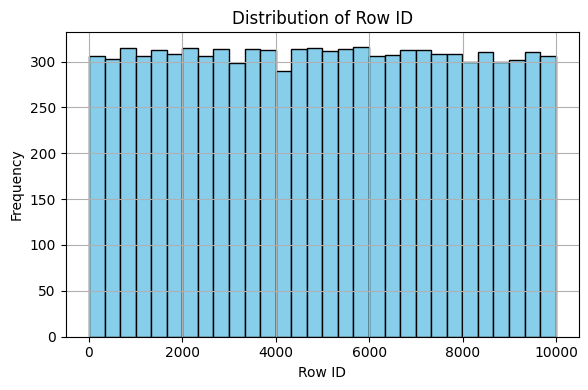

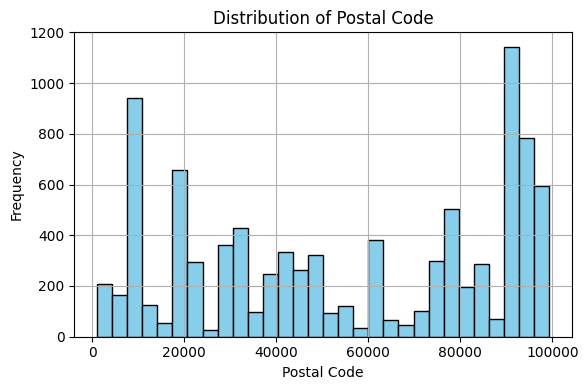

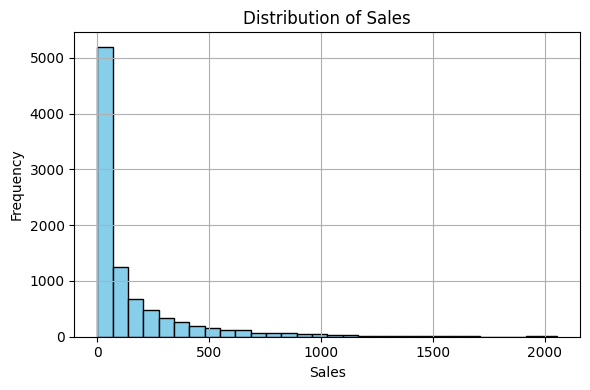

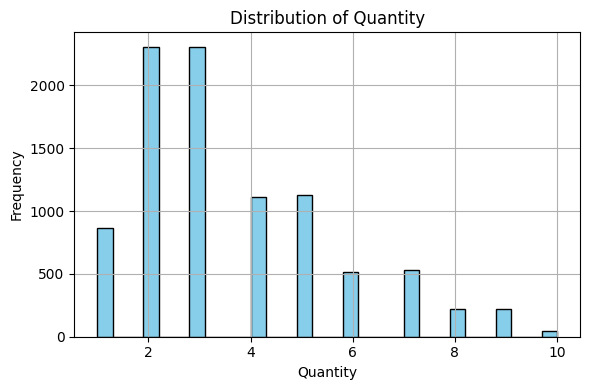

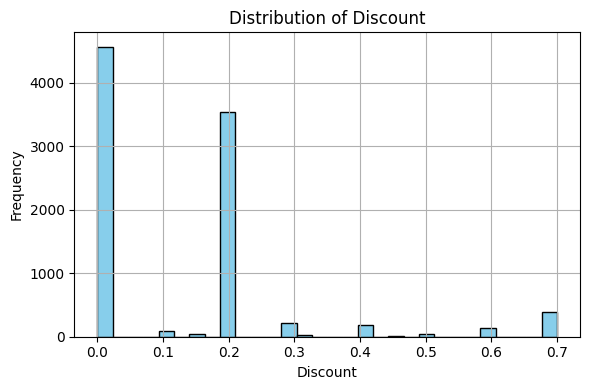

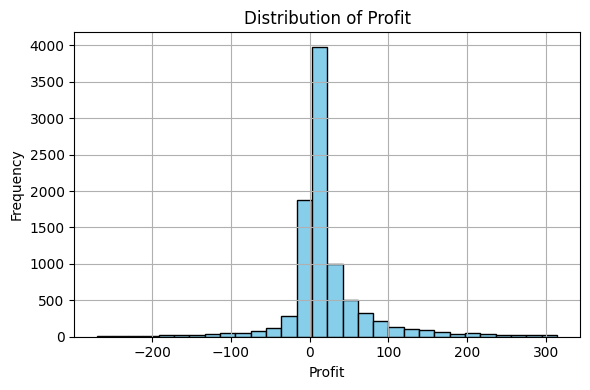

In [49]:
import matplotlib.pyplot as plt

for col in numeric_data.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(numeric_data[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


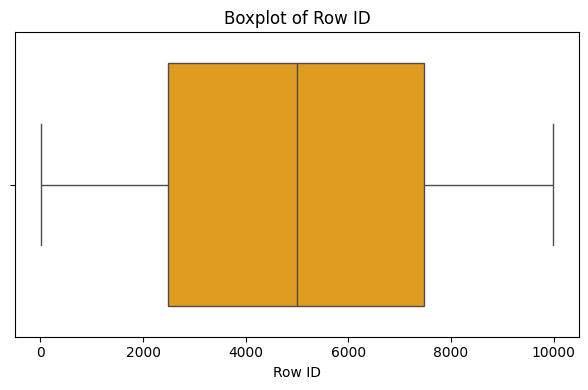

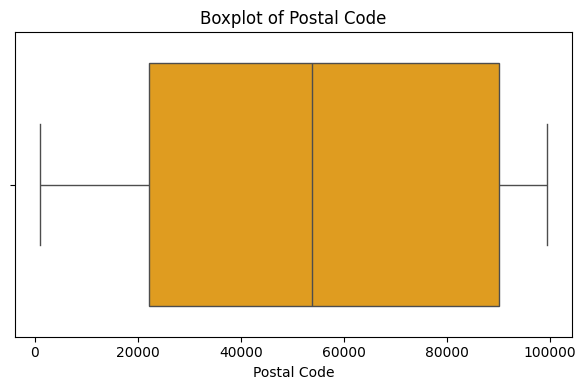

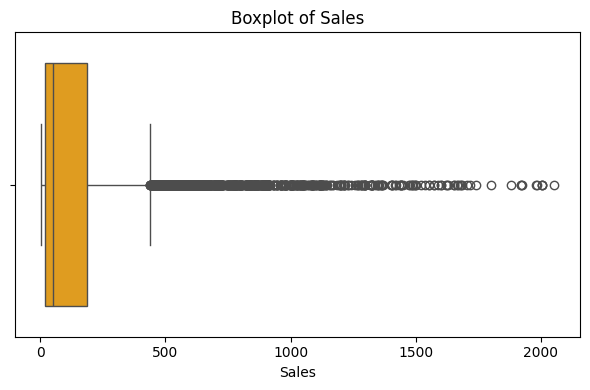

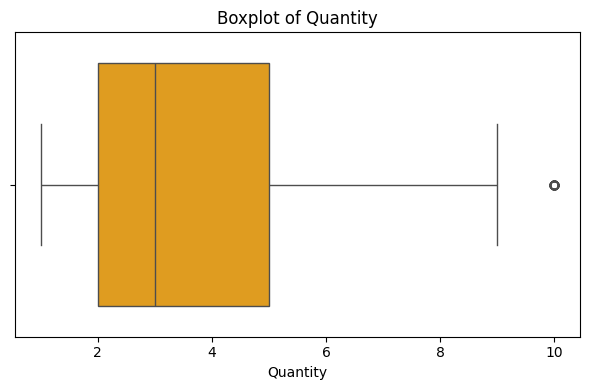

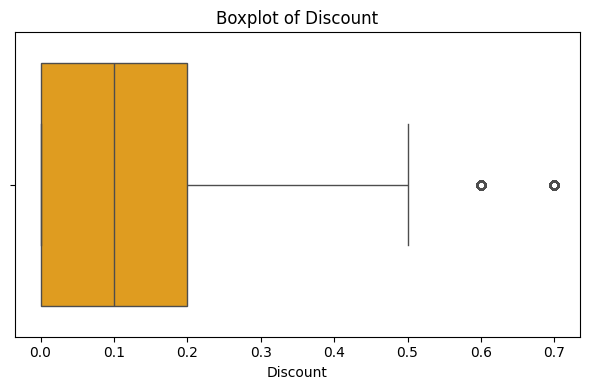

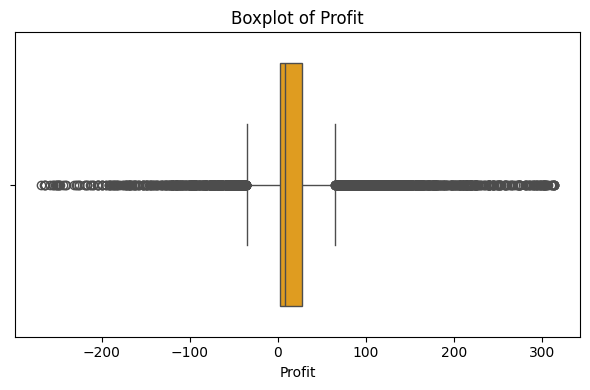

In [50]:
import seaborn as sns

for col in numeric_data.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=numeric_data[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()


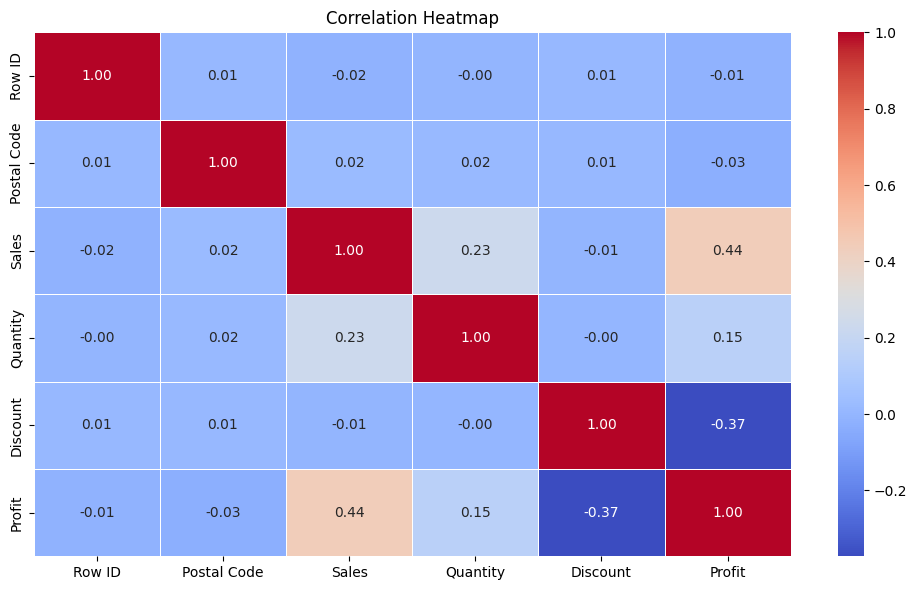

In [51]:
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()
